In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from keras.optimizers import Adam
from prophet import Prophet

In [ ]:
df = pd.read_csv('/content/JPY=X.csv')
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
6258,2024-02-20,150.270004,150.434006,149.697998,150.270004,150.270004,0.0
6259,2024-02-21,149.938995,150.294998,149.856995,149.938995,149.938995,0.0
6260,2024-02-22,150.354996,150.639008,150.016006,150.354996,150.354996,0.0
6261,2024-02-23,150.483002,150.761993,150.306000,150.483002,150.483002,0.0
6262,2024-02-24,150.440002,150.440002,150.440002,150.440002,150.440002,0.0


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.0
mean,109.451946,109.868543,108.998120,109.447954,109.447954,0.0
std,15.162680,15.223808,15.107295,15.163145,15.163145,0.0
min,75.750000,75.973999,75.570000,75.739998,75.739998,0.0
25%,102.624502,103.062750,102.285000,102.594248,102.594248,0.0
50%,109.729500,110.046498,109.351997,109.710999,109.710999,0.0
75%,118.127499,118.650002,117.607500,118.150002,118.150002,0.0
max,151.645996,151.936996,151.240005,151.645996,151.645996,0.0


In [ ]:
df.corr()['Close']

<ipython-input-4-8695f15c585d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Close']


Open         0.999537
High         0.999617
Low          0.999575
Close        1.000000
Adj Close    1.000000
Volume            NaN
Name: Close, dtype: float64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6234 entries, 0 to 6262
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6234 non-null   object 
 1   Open       6234 non-null   float64
 2   High       6234 non-null   float64
 3   Low        6234 non-null   float64
 4   Close      6234 non-null   float64
 5   Adj Close  6234 non-null   float64
 6   Volume     6234 non-null   float64
dtypes: float64(6), object(1)
memory usage: 389.6+ KB


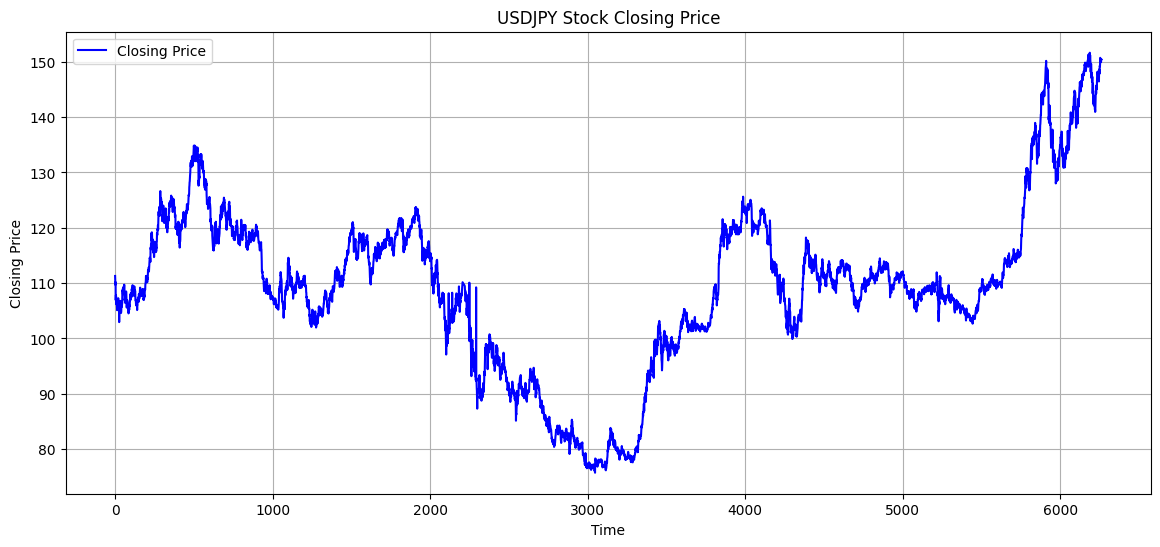

In [ ]:
plt.figure(figsize=(14, 6), dpi=100)
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('USDJPY Stock Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

columns = ['Date', 'Close']
ndf = pd.DataFrame(df, columns=columns)
prophet_df = ndf.rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_df

,ds,y
0,2000-02-24,111.300003
1,2000-02-25,110.150002
2,2000-02-28,109.699997
3,2000-02-29,110.190002
4,2000-03-01,106.940002
...,...,...
6258,2024-02-20,150.270004
6259,2024-02-21,149.938995
6260,2024-02-22,150.354996
6261,2024-02-23,150.483002


In [ ]:
mdl = Prophet()
mdl.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvxoi0hj/zgxrb9wd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvxoi0hj/3j7j7p_0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64100', 'data', 'file=/tmp/tmpcvxoi0hj/zgxrb9wd.json', 'init=/tmp/tmpcvxoi0hj/3j7j7p_0.json', 'output', 'file=/tmp/tmpcvxoi0hj/prophet_modeln12d0s0m/prophet_model-20240228124237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:42:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = mdl.make_future_dataframe(periods=15)
forecast = mdl.predict(future)
forecast.shape

(6249, 19)

In [ ]:
forecast_df = forecast[-15:]
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6234,2024-02-25,145.606070,142.955364,154.737069,145.606070,145.606070,3.193838,3.193838,3.193838,2.978735,2.978735,2.978735,0.215104,0.215104,0.215104,0.0,0.0,0.0,148.799909
6235,2024-02-26,145.631544,138.202710,150.534452,145.631544,145.631544,-1.306277,-1.306277,-1.306277,-1.517488,-1.517488,-1.517488,0.211211,0.211211,0.211211,0.0,0.0,0.0,144.325267
6236,2024-02-27,145.657017,138.191847,150.308885,145.657017,145.657017,-1.332190,-1.332190,-1.332190,-1.535608,-1.535608,-1.535608,0.203418,0.203418,0.203418,0.0,0.0,0.0,144.324827
6237,2024-02-28,145.682490,137.980951,150.119315,145.682490,145.682490,-1.341852,-1.341852,-1.341852,-1.533914,-1.533914,-1.533914,0.192062,0.192062,0.192062,0.0,0.0,0.0,144.340639
6238,2024-02-29,145.707964,138.005325,149.971441,145.707964,145.707964,-1.346829,-1.346829,-1.346829,-1.524383,-1.524383,-1.524383,0.177555,0.177555,0.177555,0.0,0.0,0.0,144.361135
6239,2024-03-01,145.733437,138.677390,150.466996,145.733437,145.733437,-1.359737,-1.359737,-1.359737,-1.520111,-1.520111,-1.520111,0.160373,0.160373,0.160373,0.0,0.0,0.0,144.373700
6240,2024-03-02,145.758910,144.844863,156.941217,145.758910,145.758910,4.793824,4.793824,4.793824,4.652770,4.652770,4.652770,0.141054,0.141054,0.141054,0.0,0.0,0.0,150.552735
6241,2024-03-03,145.784384,142.720479,154.554366,145.784384,145.784384,3.098915,3.098915,3.098915,2.978735,2.978735,2.978735,0.120180,0.120180,0.120180,0.0,0.0,0.0,148.883299
6242,2024-03-04,145.809857,138.608559,150.397165,145.809857,145.809857,-1.419114,-1.419114,-1.419114,-1.517488,-1.517488,-1.517488,0.098374,0.098374,0.098374,0.0,0.0,0.0,144.390743
6243,2024-03-05,145.835330,138.219097,150.168052,145.835330,145.835330,-1.459325,-1.459325,-1.459325,-1.535608,-1.535608,-1.535608,0.076284,0.076284,0.076284,0.0,0.0,0.0,144.376006


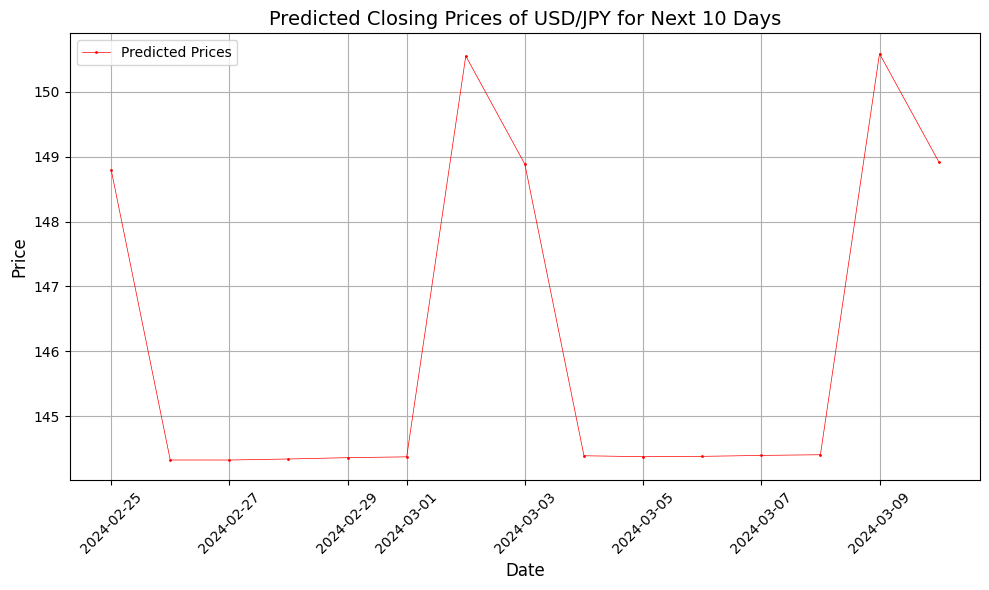

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)

plt.plot(forecast_df['ds'], forecast_df['yhat'], label='Predicted Prices',
         color='red', marker='o', markersize=1, linewidth=0.5)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Predicted Closing Prices of USD/JPY for Next 10 Days', fontsize=14)

plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

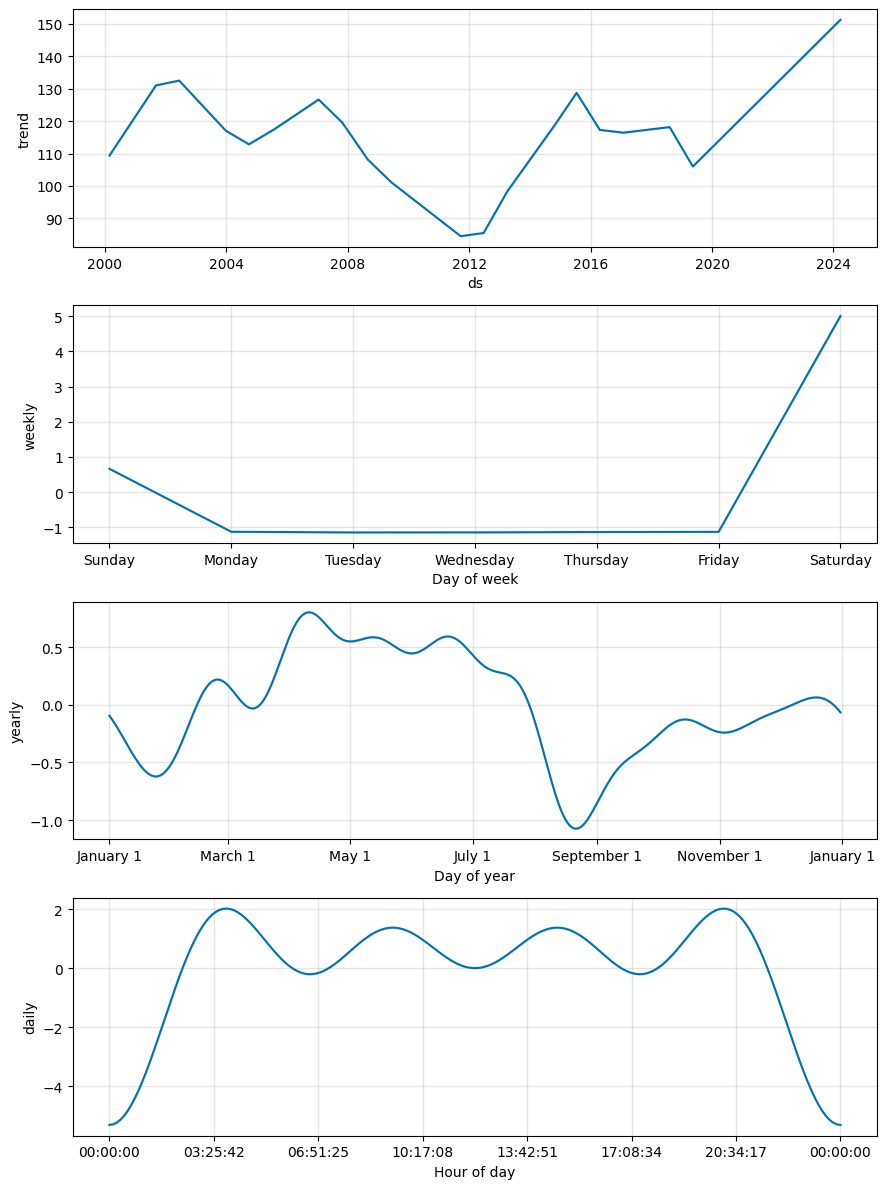

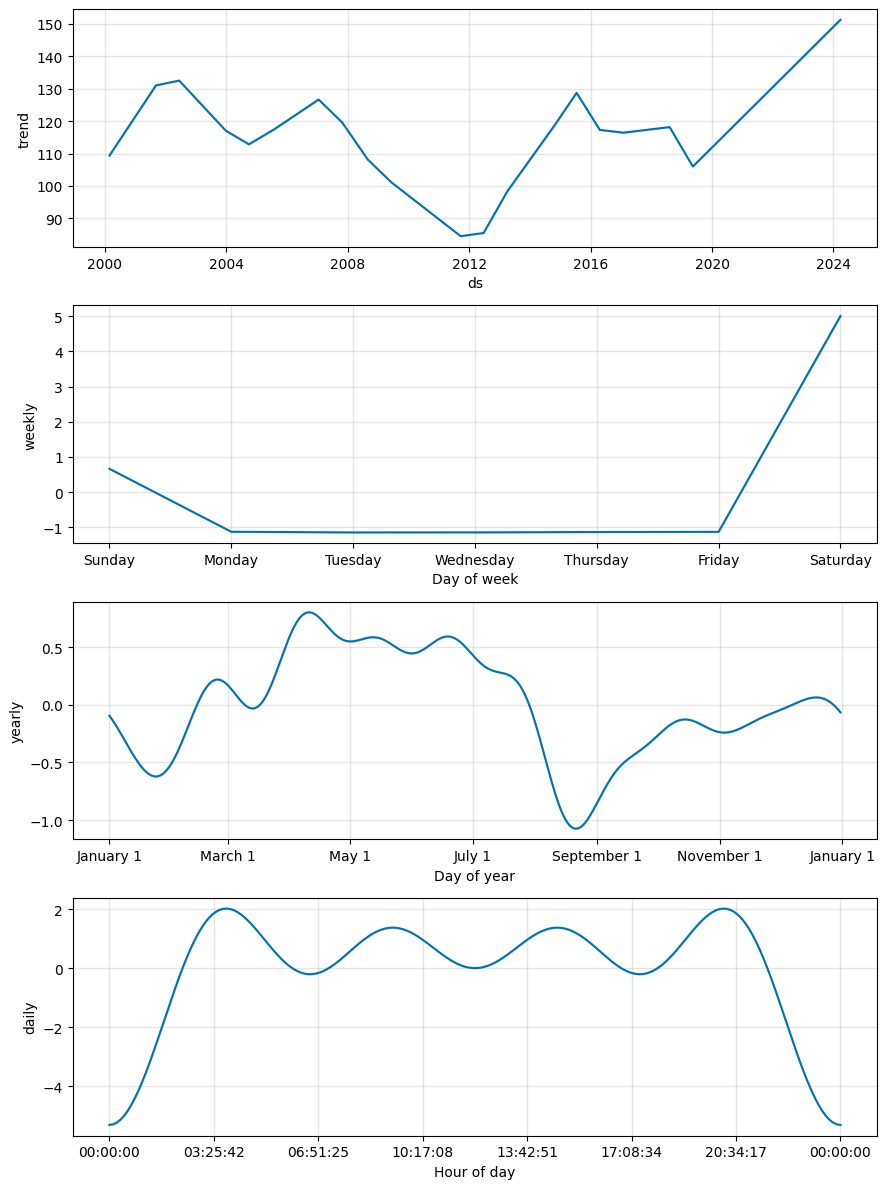

In [ ]:
mdl.plot_components(forecast)